In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-boston-houseprice-data/boston.csv


In [52]:
data = pd.read_csv('/kaggle/input/the-boston-houseprice-data/boston.csv')
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Exploratory data analsis

In [53]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [54]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [55]:
data.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24

In [56]:
data.columns = ['crime_rate', 'residential_land_proportion', 'non_retail_acres', 
                'charles_river_dummy', 'nitric_oxides_concentration', 'rooms_per_dwelling', 
                'age_proportion', 'employment_access', 'highways_accessibility', 
                'property_tax_rate', 'pupil_teacher_ratio', 'black_proportion', 
                'lower_status_population', 'median_home_value']

In [57]:
data.describe()

,crime_rate,residential_land_proportion,non_retail_acres,charles_river_dummy,nitric_oxides_concentration,rooms_per_dwelling,age_proportion,employment_access,highways_accessibility,property_tax_rate,pupil_teacher_ratio,black_proportion,lower_status_population,median_home_value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [58]:
## Checking for missing values

data.isnull().sum()

crime_rate                     0
residential_land_proportion    0
non_retail_acres               0
charles_river_dummy            0
nitric_oxides_concentration    0
rooms_per_dwelling             0
age_proportion                 0
employment_access              0
highways_accessibility         0
property_tax_rate              0
pupil_teacher_ratio            0
black_proportion               0
lower_status_population        0
median_home_value              0
dtype: int64

In [59]:
data.dtypes

crime_rate                     float64
residential_land_proportion    float64
non_retail_acres               float64
charles_river_dummy              int64
nitric_oxides_concentration    float64
rooms_per_dwelling             float64
age_proportion                 float64
employment_access              float64
highways_accessibility           int64
property_tax_rate              float64
pupil_teacher_ratio            float64
black_proportion               float64
lower_status_population        float64
median_home_value              float64
dtype: object

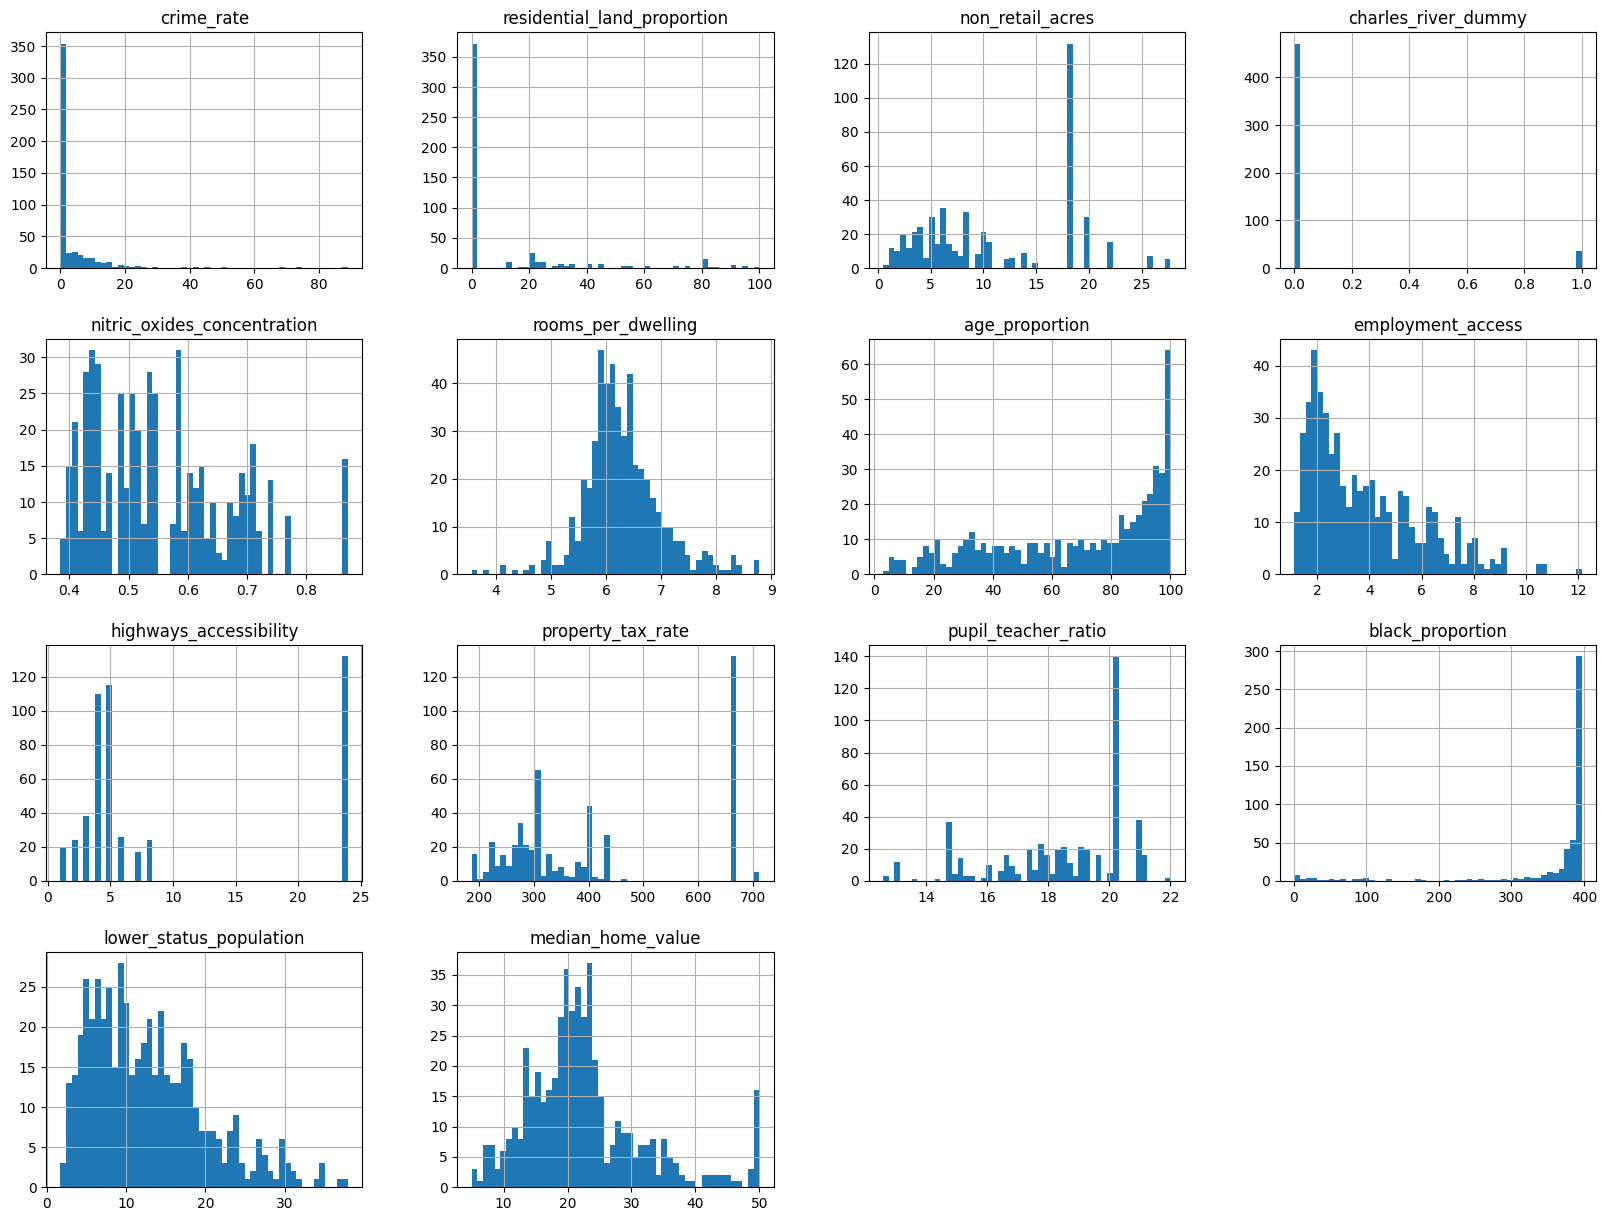

In [60]:
## Creating a histogram for ever numerical attribute.

import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [61]:
data.corr()

,crime_rate,residential_land_proportion,non_retail_acres,charles_river_dummy,nitric_oxides_concentration,rooms_per_dwelling,age_proportion,employment_access,highways_accessibility,property_tax_rate,pupil_teacher_ratio,black_proportion,lower_status_population,median_home_value
crime_rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
residential_land_proportion,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
non_retail_acres,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
charles_river_dummy,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nitric_oxides_concentration,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rooms_per_dwelling,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age_proportion,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
employment_access,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
highways_accessibility,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
property_tax_rate,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


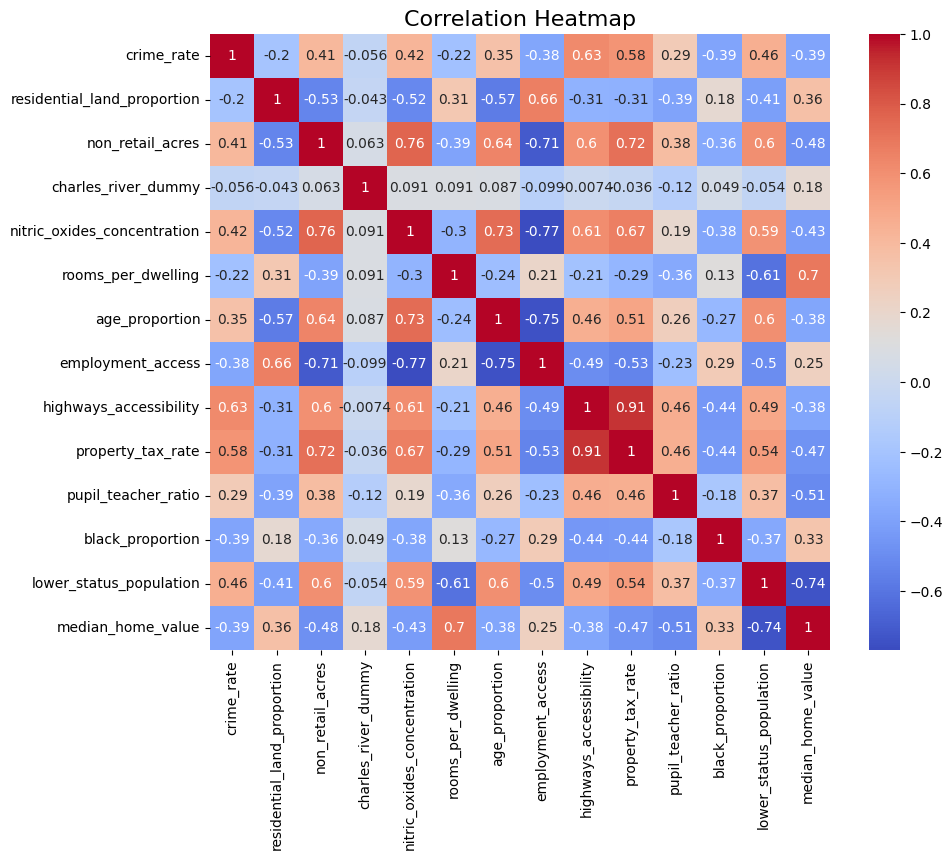

In [62]:
# Creating a heatmap for the different variables.
import seaborn as sns

corr_matrix = data.corr()

# Creating the heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

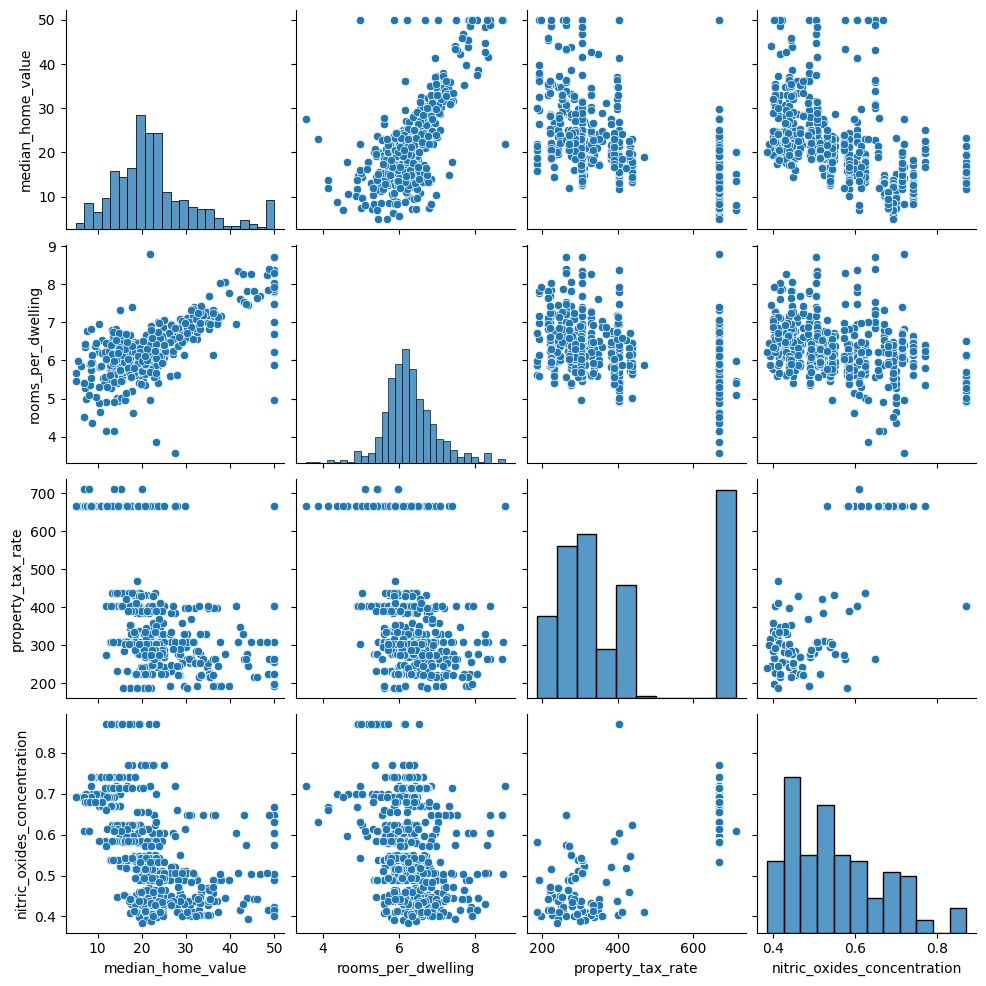

In [63]:
# Creating a scatter plot for some of the columns.

columns = ['median_home_value', 'rooms_per_dwelling', 'property_tax_rate', 'nitric_oxides_concentration']

# creating the scatter plot matrix.
sns.pairplot(data[columns])
plt.show()

In [64]:
data.columns

Index(['crime_rate', 'residential_land_proportion', 'non_retail_acres',
       'charles_river_dummy', 'nitric_oxides_concentration',
       'rooms_per_dwelling', 'age_proportion', 'employment_access',
       'highways_accessibility', 'property_tax_rate', 'pupil_teacher_ratio',
       'black_proportion', 'lower_status_population', 'median_home_value'],
      dtype='object')

In [65]:
data['median_home_value'].max()

50.0

In [66]:
data['median_home_value'].min()

5.0

In [67]:
# Creating a median home value category to allow for stratifed shuffle split.

data['home_value_cat'] = pd.cut(data['median_home_value'],
                                  bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, np.inf],
                                  labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

<Axes: >

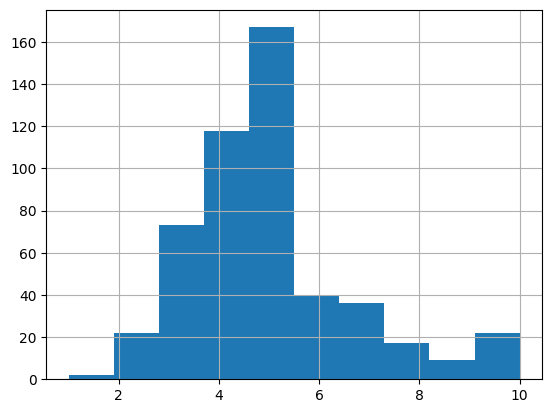

In [68]:
data['home_value_cat'].hist()

In [69]:
# Doing the scikitlearn StratifiedShuffleSplit using the home_value_cat.
from sklearn.model_selection import StratifiedShuffleSplit

In [70]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['home_value_cat']):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [72]:
# Confirming the functionality of the stratified sampling.
strat_test_set['home_value_cat'].value_counts() / len(strat_test_set)

home_value_cat
5     0.333333
4     0.235294
3     0.147059
6     0.078431
7     0.068627
2     0.049020
10    0.039216
8     0.029412
9     0.019608
1     0.000000
11    0.000000
Name: count, dtype: float64

In [73]:
data.columns

Index(['crime_rate', 'residential_land_proportion', 'non_retail_acres',
       'charles_river_dummy', 'nitric_oxides_concentration',
       'rooms_per_dwelling', 'age_proportion', 'employment_access',
       'highways_accessibility', 'property_tax_rate', 'pupil_teacher_ratio',
       'black_proportion', 'lower_status_population', 'median_home_value',
       'home_value_cat'],
      dtype='object')

In [74]:
# removing the temporary housing value category column.
for set_ in (strat_train_set, strat_test_set):
    set_.drop('home_value_cat', axis=1, inplace=True)

In [76]:
strat_train_set.columns

Index(['crime_rate', 'residential_land_proportion', 'non_retail_acres',
       'charles_river_dummy', 'nitric_oxides_concentration',
       'rooms_per_dwelling', 'age_proportion', 'employment_access',
       'highways_accessibility', 'property_tax_rate', 'pupil_teacher_ratio',
       'black_proportion', 'lower_status_population', 'median_home_value'],
      dtype='object')

# Preparing the Data for Machine Learning Algorithms.

In [77]:
data = strat_train_set.drop("median_home_value", axis=1)
data_labels = strat_train_set["median_home_value"].copy()

In [79]:
# Creating an imputer to fill in the missing values with the median of that numerical column.
from sklearn.impute import SimpleImputer

In [80]:
imputer = SimpleImputer(strategy="median")

In [81]:
# Fitting the imputer instance to the training data.
imputer.fit(data)

SimpleImputer(strategy='median')

In [82]:
imputer.statistics_

array([2.29015e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.32000e-01,
       6.20200e+00, 7.67000e+01, 3.30570e+00, 5.00000e+00, 3.30000e+02,
       1.88500e+01, 3.91985e+02, 1.12350e+01])

In [83]:
data.median().values

array([2.29015e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.32000e-01,
       6.20200e+00, 7.67000e+01, 3.30570e+00, 5.00000e+00, 3.30000e+02,
       1.88500e+01, 3.91985e+02, 1.12350e+01])

In [84]:
# Now we can use this "trained" imputer to transform the training set by replacing the missing values in the training set.
X = imputer.transform(data)

In [85]:
data = pd.DataFrame(X, columns=data.columns, index=data.index)

In [86]:
# Creating a Numerical Data Pipeline.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Creating a Numerical Data Pipeline.

In [87]:
data_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

data_tr = data_pipeline.fit_transform(data)

In [88]:
data_tr

array([[-0.2492046 , -0.500292  , -0.4440983 , ...,  1.19048592,
         0.19669638,  0.0625823 ],
       [-0.39483247,  1.96656683, -1.38062722, ..., -0.04614111,
         0.38115439, -0.68150122],
       [-0.39615897, -0.500292  ,  0.1062032 , ...,  1.19048592,
         0.43519113, -0.98622114],
       ...,
       [-0.00848726, -0.500292  ,  1.00207661, ...,  0.82407791,
        -0.06556507, -1.0358267 ],
       [-0.38852028, -0.500292  , -0.38311502, ...,  1.14468492,
         0.4155629 , -0.04654995],
       [-0.38243637, -0.500292  , -0.55444899, ...,  0.5492719 ,
         0.43519113, -0.811893  ]])

## Training Linear Regression models.

In [89]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_tr, data_labels)

LinearRegression()

In [90]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
# Performing cross-validation in the Linear Regression Model.

lin_scores = cross_val_score(lin_reg, data_tr, data_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sort(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [11.030715   12.07361047 14.2292208  15.8852475  20.81571697 25.81439723
 26.39590487 30.05289605 37.3778544  42.37515595]
Mean: 23.605071923167316
Standard deviation: 10.210884997081582


In [94]:
# Training a decision tree regressor

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_tr, data_labels)

DecisionTreeRegressor()

In [96]:
# evaluation using the K-fold cross validation.
scores = cross_val_score(tree_reg, data_tr, data_labels,
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [4.51814769 4.00204216 9.03000419 3.39184819 4.14677586 5.28140606
 6.72104903 6.50274942 2.87097544 4.071302  ]
Mean: 5.053630003682821
Standard deviation: 1.7733893428930156


In [118]:
# Training random Forests.

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(data_tr, data_labels)

RandomForestRegressor()

In [119]:
# Evaluating the random forest regressor.
from sklearn.metrics import mean_squared_error

data_predictions = forest_reg.predict(data_tr)
forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.354650465494094

In [106]:
# Training a support vecor machine.
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr_reg = SVR()

svr_reg.fit(data_tr, data_labels)
data_predictions = svr_reg.predict(data_tr)
svr_mse = mean_squared_error(data_labels, data_predictions)

# calculating the RMSE
svr_rmse = np.sqrt(svr_mse)

print(f'SVR RMSE: {svr_rmse}')

SVR RMSE: 5.246254071616638


In [111]:
# Fine Tuning the Model using grid-search.

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 5, 10 ,30], 'max_features':[2, 4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(data_tr, data_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [3, 5, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [112]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5.17306831935967 {'max_features': 2, 'n_estimators': 3}
5.109053107408553 {'max_features': 2, 'n_estimators': 5}
4.355901842101667 {'max_features': 2, 'n_estimators': 10}
4.177088804456461 {'max_features': 2, 'n_estimators': 30}
5.0325840576852805 {'max_features': 4, 'n_estimators': 3}
4.429943202545354 {'max_features': 4, 'n_estimators': 5}
4.256483231495221 {'max_features': 4, 'n_estimators': 10}
4.022066127180519 {'max_features': 4, 'n_estimators': 30}
4.408981044934911 {'max_features': 6, 'n_estimators': 3}
4.4688526022064 {'max_features': 6, 'n_estimators': 5}
4.000216972510428 {'max_features': 6, 'n_estimators': 10}
4.011294311032993 {'max_features': 6, 'n_estimators': 30}
4.827222534807018 {'max_features': 8, 'n_estimators': 3}
4.448275319827635 {'max_features': 8, 'n_estimators': 5}
4.11425296048256 {'max_features': 8, 'n_estimators': 10}
4.02759834759978 {'max_features': 8, 'n_estimators': 30}
4.394871933757449 {'max_features': 10, 'n_estimators': 3}
4.179099908997476 {'max_fe

In [113]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 10}

In [117]:
# Training our forest on the best parameters.
best_params = {'max_features': 6, 'n_estimators': 10}

best_forest_reg = RandomForestRegressor(**best_params)

best_forest_reg.fit(data_tr, data_labels)

data_predictions = best_forest_reg.predict(data_tr)

forest_mse = mean_squared_error(data_labels, data_predictions)
forest_rmse = np.sqrt(forest_mse)

print(f"Trained model RMSE: {forest_rmse}")

Trained model RMSE: 1.4426602387105691


In [120]:
forest_rmse

1.354650465494094

# Evaluating the System on the test set

In [121]:
final_model = forest_reg

In [123]:
X_test = strat_test_set.drop("median_home_value", axis=1)
y_test = strat_test_set["median_home_value"].copy()

X_test_prepared = data_pipeline.fit_transform(X_test)

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

3.130563897083957